In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
#make a copy of the dataframe 
df = data

In [4]:
#examing the data and columns
print (df.shape)
df.head()

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


--------------------------------------------Categorical--------------------------------
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

CouncilArea: Governing council for the area




--------------------------------------------Continuous---------------------------------
Price: Price in Australian dollars

Distance: Distance from CBD in Kilometres

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

Lattitude: Self explanitory

Longtitude: Self explanitory

Number Null
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64
-------------------------------------------------------------------
Percentage Null
Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
Yea

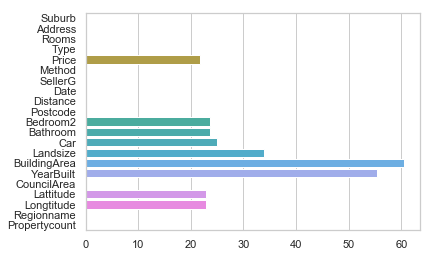

In [5]:
sns.set(style="whitegrid")
print ('Number Null' )
print (df.isnull().sum())
print ('-------------------------------------------------------------------')
print ('Percentage Null')
print (df.isnull().sum()*100/df.isnull().count()) #this is to get a percentage missing
null_percent = df.isnull().sum()*100/df.isnull().count()
sns.barplot(x= null_percent, y = df.columns)

So much missing in 'BuildingArea' variable that it makes sense to drop it.  'YearBuilt' also has a lot of missing data, but we know that the year a house is built can have a huge impact on value, so I will attempt to utilize it.

In [6]:

#q75, q25 = np.percentile(df2["Price"], [75 ,25])
#iqr = q75 - q25

#for threshold in np.arange(1,5,0.5):
    #min_val = q25 - (iqr*threshold)
    #max_val = q75 + (iqr*threshold)
    #print("The score threshold is: {}".format(threshold))
    #print("Number of outliers is: {}".format(
        #len((np.where((df["Price"] > max_val)| (df["Price"] < min_val))[0]))))


In [7]:
#Drop columns 'Bulding Area' and "YearBuilt" due to missing data > 60%
df2 = df
df2 = df2.drop('BuildingArea', axis = 1)
df2 = df2.drop('YearBuilt', axis=1)
df2['Price']=df2['Price'].interpolate()
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1250000.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
df2['Price'] = df2['Price'].fillna(df2['Price'].mode()[0])

In [9]:
#get details for each column
print (df2.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  3.485700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.073071e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.304036e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.550000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  9.000000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.311000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize     Lattitude    Longtitude  \
count  26631.000000  26129.000000   23047.000000  26881.000000  26881.000000   
mean       1.624798      1.728845     593.598993    -37.810634    145.001851   
std        0.724212      1.010771    3398.841946

In [10]:
#Find how many 'Price' values are $0
print ((df2[['Price']] == 0).sum())

Price    0
dtype: int64


In [11]:
#Find out how many 'Price' values are missing
df2.Price.isnull().sum()

0

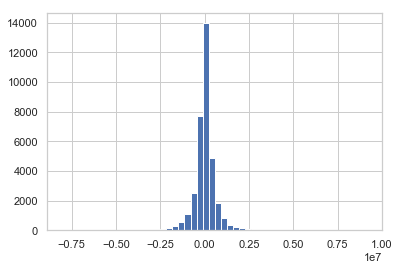

In [12]:
#Plot the clean price dataset looking for distribution.
plt.figure()
df2.Price.diff().hist(bins=50)


In [13]:
#Looking for distribution and outliers
df2.Bedroom2.value_counts()

3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
12.0        1
20.0        1
16.0        1
Name: Bedroom2, dtype: int64

In [14]:
#Looking for distribution and outliers
df2['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [15]:
#Replace listings that claim 0 bathrooms to having 1 bathroom.
df2['Bathroom'] = df2['Bathroom'].fillna(df2['Bathroom'].mode()[0])

In [16]:
#make sure that the replace worked
df2['Bathroom'].unique()

array([ 1.,  2.,  3.,  7.,  4.,  0.,  5.,  6., 12.,  8.,  9.])

In [17]:
df2['Bathroom'].value_counts()

1.0     21195
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [18]:
df2['Car'].unique()

array([ 1.,  0.,  2., nan,  6.,  5.,  4.,  3.,  8.,  7., 11., 26.,  9.,
       10., 18., 12.])

In [19]:
df2['Car'] = df2['Car'].fillna(df2['Car'].mode()[0])

In [20]:
df2['Car'].unique()

array([ 1.,  0.,  2.,  6.,  5.,  4.,  3.,  8.,  7., 11., 26.,  9., 10.,
       18., 12.])

In [21]:
df2.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom             0
Car                  0
Landsize         11810
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [22]:
df2['Car'].describe()

count    34857.000000
mean         1.796741
std          0.882969
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

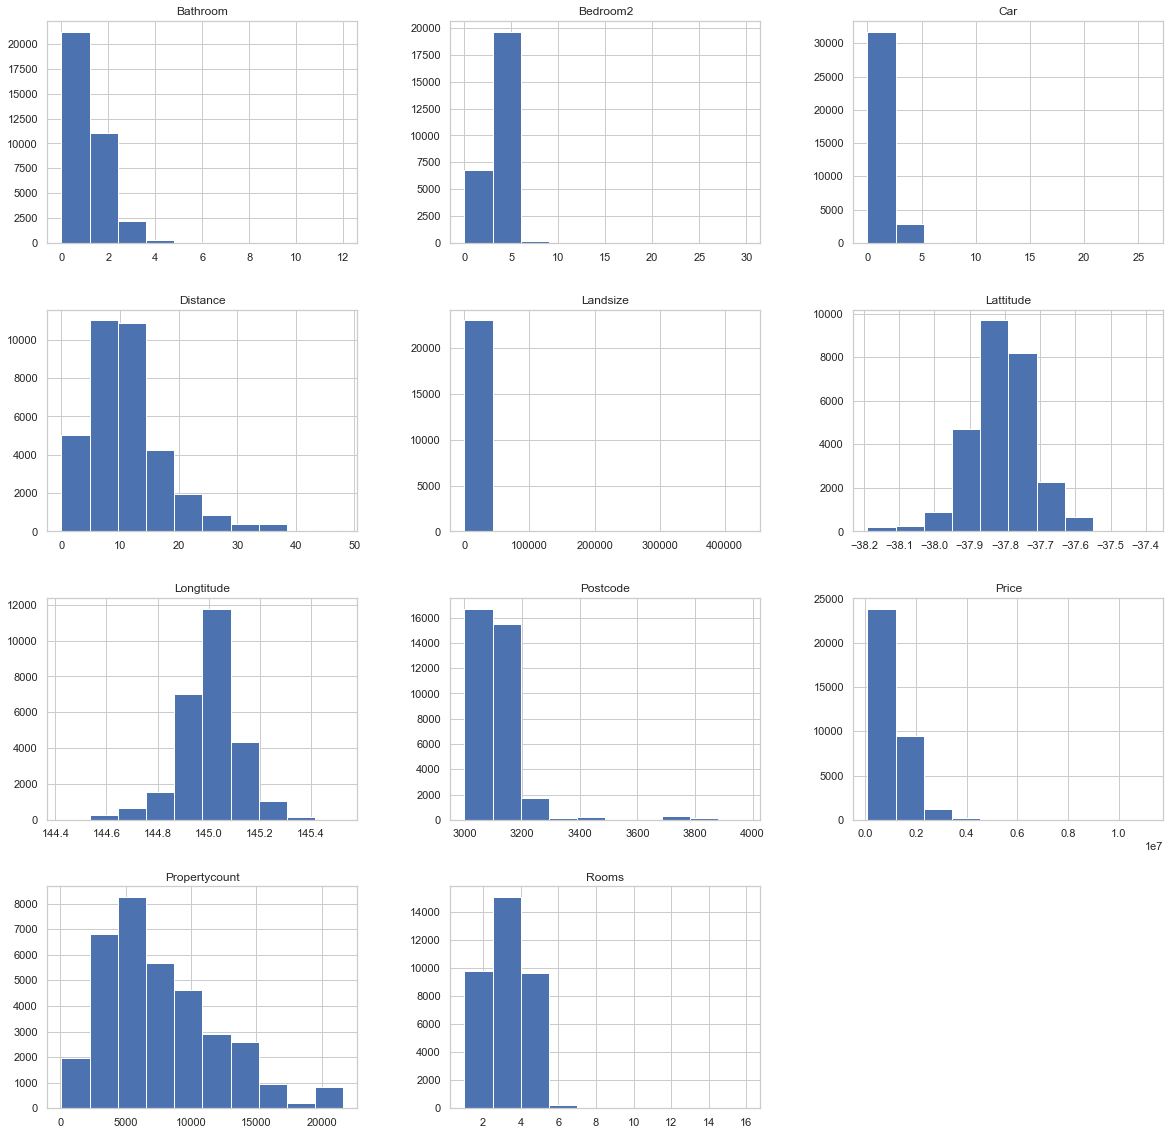

In [23]:
#Plot histogram of each parameter
df2.hist(figsize = (20,20))
plt.show()

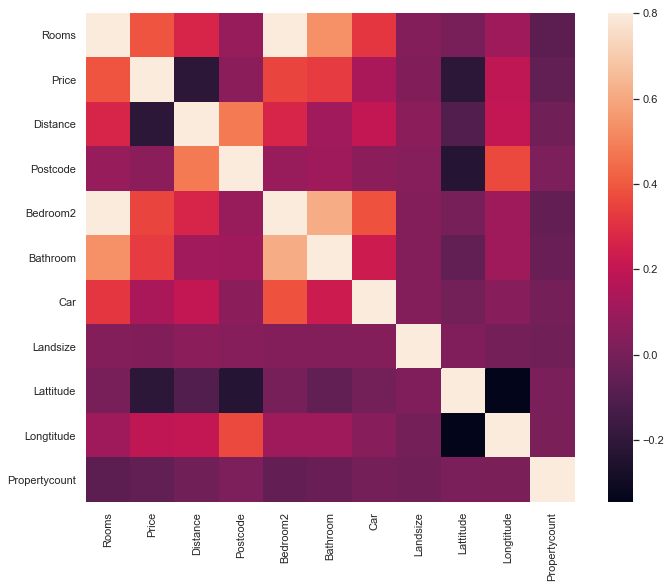

In [24]:
#use a heatmap to display the correlations between variables
corrmat = df2.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [25]:
#create a new copy of the df dataset
dfdum = df2
columns = dfdum.columns.tolist()
columns = [c for c in columns if c not in ['Price']]
target = 'Price'


X= dfdum[columns]
y= dfdum[target]

print(X.shape)
print(y.shape)

(34857, 18)
(34857,)


In [26]:
#DROPPING BEDROOM2 IN FAVOR OF ROOMS DUE TO CORRELATION

#dummybed = pd.get_dummies(df['Bedroom2'])
#dummybed = dummybed.rename(columns={0.0: "bed0", 1.0: "bed1", 2.0:'bed2', 3.0:'bed3', 4.0:'bed4', 5.0:'bed5',
                    #6.0:'bed6', 7.0:'bed7', 8.0:'bed8', 9.0:'bed9', 10.0:'bed10', 12.0:'bed12',
                    #16.0:'bed16', 20.0:'bed20', 30.0:'bed30'})

#dfdum = df.merge(dummybed, left_index=True, right_index=True)




In [27]:
#bedroom2 and room variables are extremely correlated.  Drop bedroom for initial analysis.
dfdum = dfdum.drop('Bedroom2', axis = 1)

In [28]:
#verify bedrooms dropped
dfdum.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [29]:
#get dummy variables for the type of housing
dummytype = pd.get_dummies(df2['Type'])
dummytype.columns

Index(['h', 't', 'u'], dtype='object')

In [30]:
#rename the columns for better understanding
dummytype = dummytype.rename(columns={'h':'house' , 't':'townhouse', 'u':'unit,duplex'})
dfdum = dfdum.merge(dummytype, left_index=True, right_index = True)

In [31]:
#get dummy variables for the number of bathrooms
dummybath = pd.get_dummies(df2['Bathroom'])
dummybath.columns

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0], dtype='float64')

In [32]:
#rename the columns for better understanding
dummybath = dummybath.rename(columns={0.0:'bath0', 1.0:'bath1', 2.0:'bath2', 3.0:'bath3', 4.0:'bath4', 5.0:'bath5',
                                     6.0:'bath6', 7.0:'bath7', 8.0:'bath8', 9.0:'bath9', 12.0:'bath12'})

dfdum = dfdum.merge(dummybath, left_index=True, right_index=True)

In [33]:
#get dummy variables for the number of carspots that come with housing
dummycar = pd.get_dummies(df2['Car'])
dummycar.columns

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
              12.0, 18.0, 26.0],
             dtype='float64')

In [34]:
#rename the variables for better understanding
dummycar = dummycar.rename(columns={0.0:'car0', 1.0:'car1', 2.0:'car2', 3.0:'car3', 4.0:'car4', 5.0:'car5', 
                                   6.0:'car6', 7.0:'car7', 8.0:'car8', 9.0:'car9', 10.0:'car10', 11.0:'car11',
                                   12.0:'car12', 18.0:'car18', 26.0:'car26'})

dfdum = dfdum.merge(dummycar, left_index=True, right_index=True)

In [35]:
#get dummy variables for the number of rooms (which includes bedrooms)
dummyrooms = pd.get_dummies(df2['Rooms'])
dummyrooms.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16], dtype='int64')

In [36]:
#rename the variables for better understanding
dummyrooms = dummyrooms.rename(columns={1:'room1', 2:'room2', 3:'room3', 4:'room4', 5:'room5', 6:'room6',
                                       7:'room7', 8:'room8', 9:'room9', 10:'room10', 12:'room12', 16:'room16'})
dfdum = dfdum.merge(dummyrooms, left_index=True, right_index=True)

In [37]:
#verify the dataframe took the changes correctly
dfdum.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'house', 'townhouse', 'unit,duplex', 'bath0', 'bath1', 'bath2', 'bath3',
       'bath4', 'bath5', 'bath6', 'bath7', 'bath8', 'bath9', 'bath12', 'car0',
       'car1', 'car2', 'car3', 'car4', 'car5', 'car6', 'car7', 'car8', 'car9',
       'car10', 'car11', 'car12', 'car18', 'car26', 'room1', 'room2', 'room3',
       'room4', 'room5', 'room6', 'room7', 'room8', 'room9', 'room10',
       'room12', 'room16'],
      dtype='object')

In [38]:
#drop bath12 variable as there is no information associated with it and price...this variable is also an outlier
dfdum = dfdum.drop('bath12', axis = 1)

In [39]:
#drop car12 and car26 as there is no information associated with them and price...these are also outliers
dfdum = dfdum.drop('car12', axis = 1)
dfdum = dfdum.drop('car26', axis = 1)


In [40]:
#drop the original variable the dummies came from
dfdum = dfdum.drop('Car', axis = 1)
dfdum = dfdum.drop('Bathroom', axis = 1)
dfdum = dfdum.drop('Type', axis = 1)
dfdum = dfdum.drop('Rooms', axis = 1)

In [41]:
#verify that they dropped correctly from the dataframe
dfdum.columns

Index(['Suburb', 'Address', 'Price', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'house', 'townhouse', 'unit,duplex',
       'bath0', 'bath1', 'bath2', 'bath3', 'bath4', 'bath5', 'bath6', 'bath7',
       'bath8', 'bath9', 'car0', 'car1', 'car2', 'car3', 'car4', 'car5',
       'car6', 'car7', 'car8', 'car9', 'car10', 'car11', 'car18', 'room1',
       'room2', 'room3', 'room4', 'room5', 'room6', 'room7', 'room8', 'room9',
       'room10', 'room12', 'room16'],
      dtype='object')

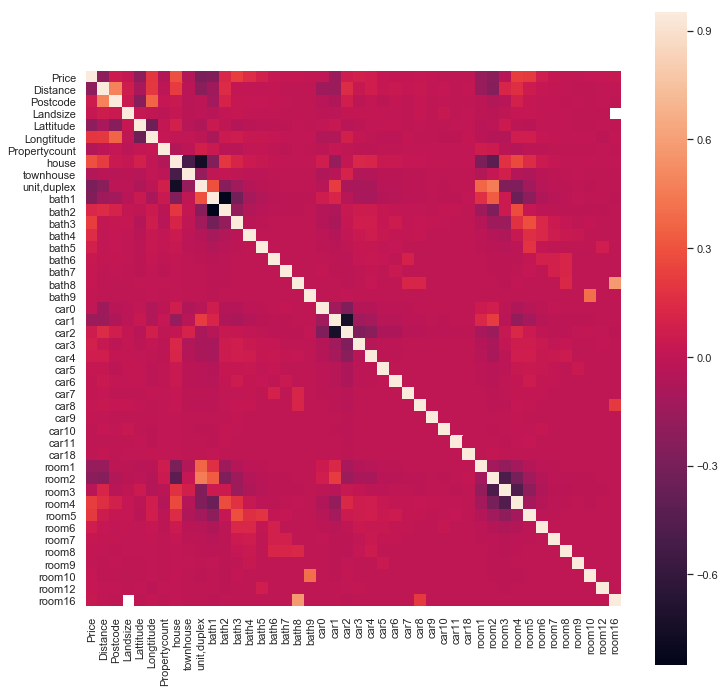

In [62]:
#look for correlations between the new variables and price prediciting
corrmat = dfdum.corr()
fig = plt.figure(figsize = (12,12))

sns.heatmap(corrmat, vmax = .95, square = True)
plt.show()

Variables correlated with price = room1-room6, car1-car4, bath1-bath5, house,townhouse,unit/duplex, latitude, longitude, yearbuilt, distance from city hub


Potentially Skewed:
Price = right skewed
Bathroom = right skewed
Car = right skewed
Landsize = right skewed
BuildingArea = right skewed
YearBuilt = left skewed
PropertyCount = right skewed


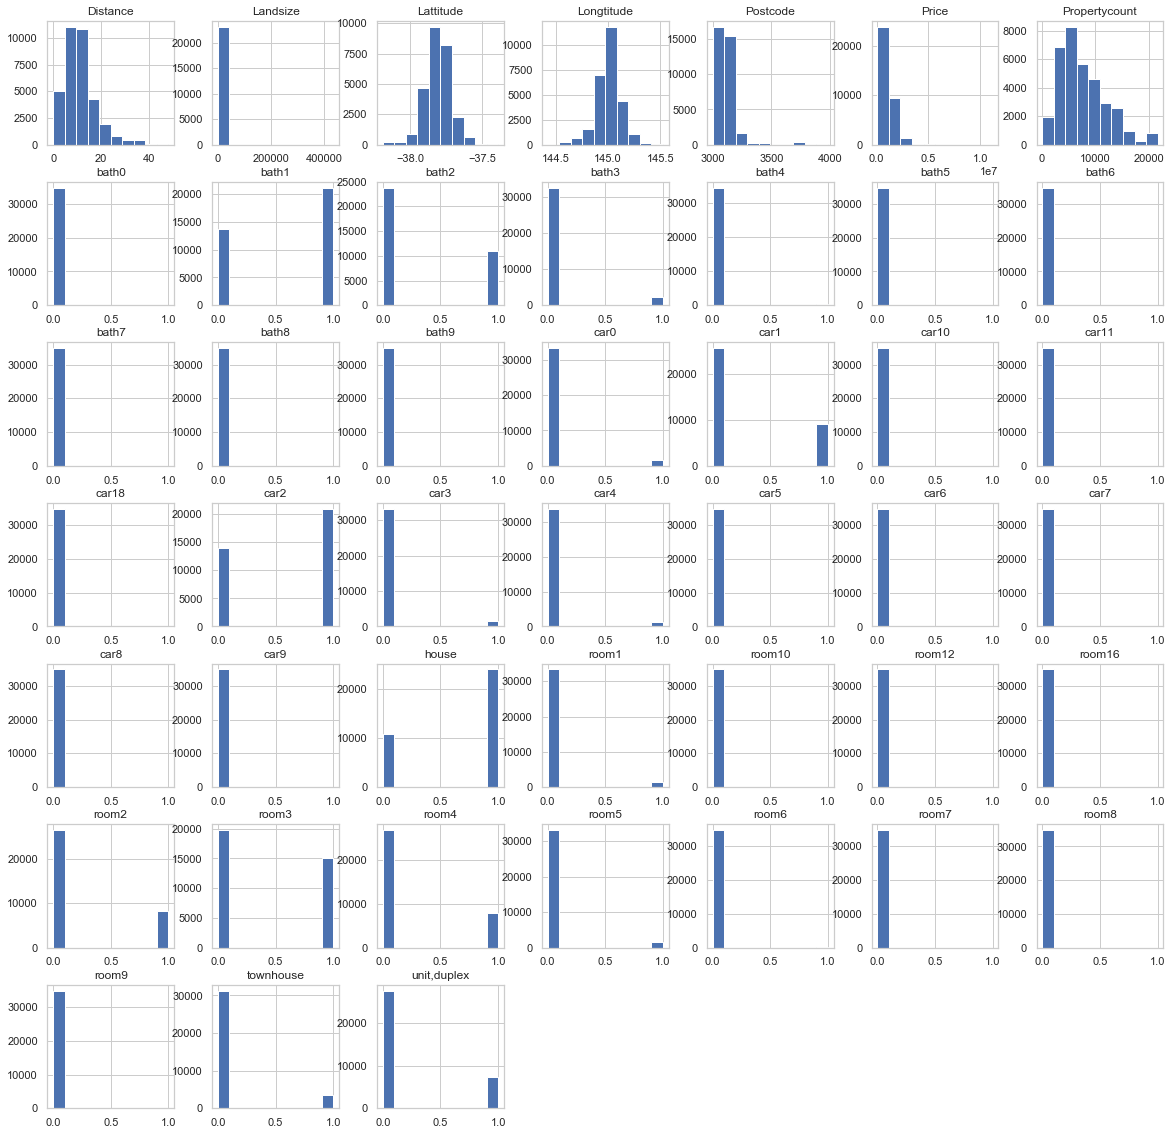

In [43]:
dfdum.hist(figsize=(20,20))
plt.show()

Dependent Variable = Price = y

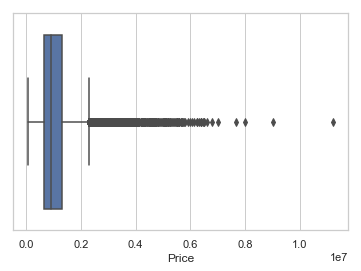

In [69]:
sns.boxplot(dfdum['Price'])

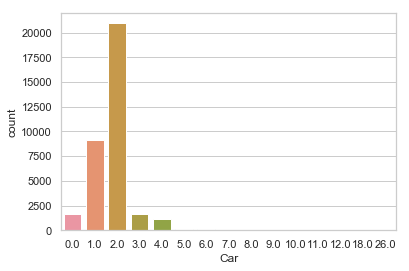

In [67]:
cntplt = sns.countplot(df2['Car'])

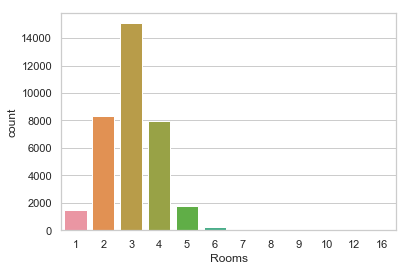

In [68]:
cntplt = sns.countplot(df2['Rooms'])

In [44]:
dfdum.shape

(34857, 52)

In [45]:
dfdum.columns

Index(['Suburb', 'Address', 'Price', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'house', 'townhouse', 'unit,duplex',
       'bath0', 'bath1', 'bath2', 'bath3', 'bath4', 'bath5', 'bath6', 'bath7',
       'bath8', 'bath9', 'car0', 'car1', 'car2', 'car3', 'car4', 'car5',
       'car6', 'car7', 'car8', 'car9', 'car10', 'car11', 'car18', 'room1',
       'room2', 'room3', 'room4', 'room5', 'room6', 'room7', 'room8', 'room9',
       'room10', 'room12', 'room16'],
      dtype='object')

In [48]:
#Why would there be 0 bathrooms in a unit or house?
dfdum['bath0'].value_counts()

KeyError: 'bath0'

In [47]:
#drop 'bath0' as it is highly unlikely that a unit/house will not include a bathroom
dfdum = dfdum.drop('bath0', axis = 1)

In [81]:
target = 'Price'
columns = dfdum[['bath1', 'bath2', 'bath3', 'bath4', 'bath5', 'bath6', 'bath7',
       'bath8', 'bath9', 'car0', 'car1', 'car2', 'car3', 'car4', 'car5',
       'car6', 'car7', 'car8', 'car9', 'car10', 'car11', 'car18', 'room1',
       'room2', 'room3', 'room4', 'room5', 'room6', 'room7', 'room8', 'room9',
       'room10', 'room12', 'room16']]

X= columns
y= dfdum[target]

print(X.shape)
print(y.shape)


(34857, 34)
(34857,)


In [82]:
from sklearn import linear_model
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split


regr = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
regr.fit(X_train, y_train)


print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

print("R-squared of the model in the training set is: {}".format(regr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(regr.score(X_test, y_test)))


The number of observations in training set is 24399
The number of observations in test set is 10458
R-squared of the model in the training set is: 0.190989475315113
-----Test set statistics-----
R-squared of the model in the test set is: 0.1783592662243395


In [83]:
# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)




Coefficients: 
 [ 6.52191092e+04  1.50231073e+05  4.29580442e+05  9.27881159e+05
  7.26698683e+05  5.91956363e+05  1.01799741e+06  2.38082900e+05
  5.26871026e+05  6.68015781e+04 -1.14239903e+05 -7.43841220e+04
  7.82540687e+03 -7.43694048e+04 -1.49271694e+05 -1.75599772e+05
  1.32272283e+05 -2.90469443e+05  1.01221122e+06 -5.92096066e+05
 -6.12638034e+05  2.05871640e+05 -1.41010528e+17 -1.41010528e+17
 -1.41010528e+17 -1.41010528e+17 -1.41010528e+17 -1.41010528e+17
 -1.41010528e+17 -1.41010528e+17 -1.41010528e+17 -1.41010528e+17
 -1.41010528e+17 -1.41010528e+17]
Intercept: 
 1.4101052793943966e+17


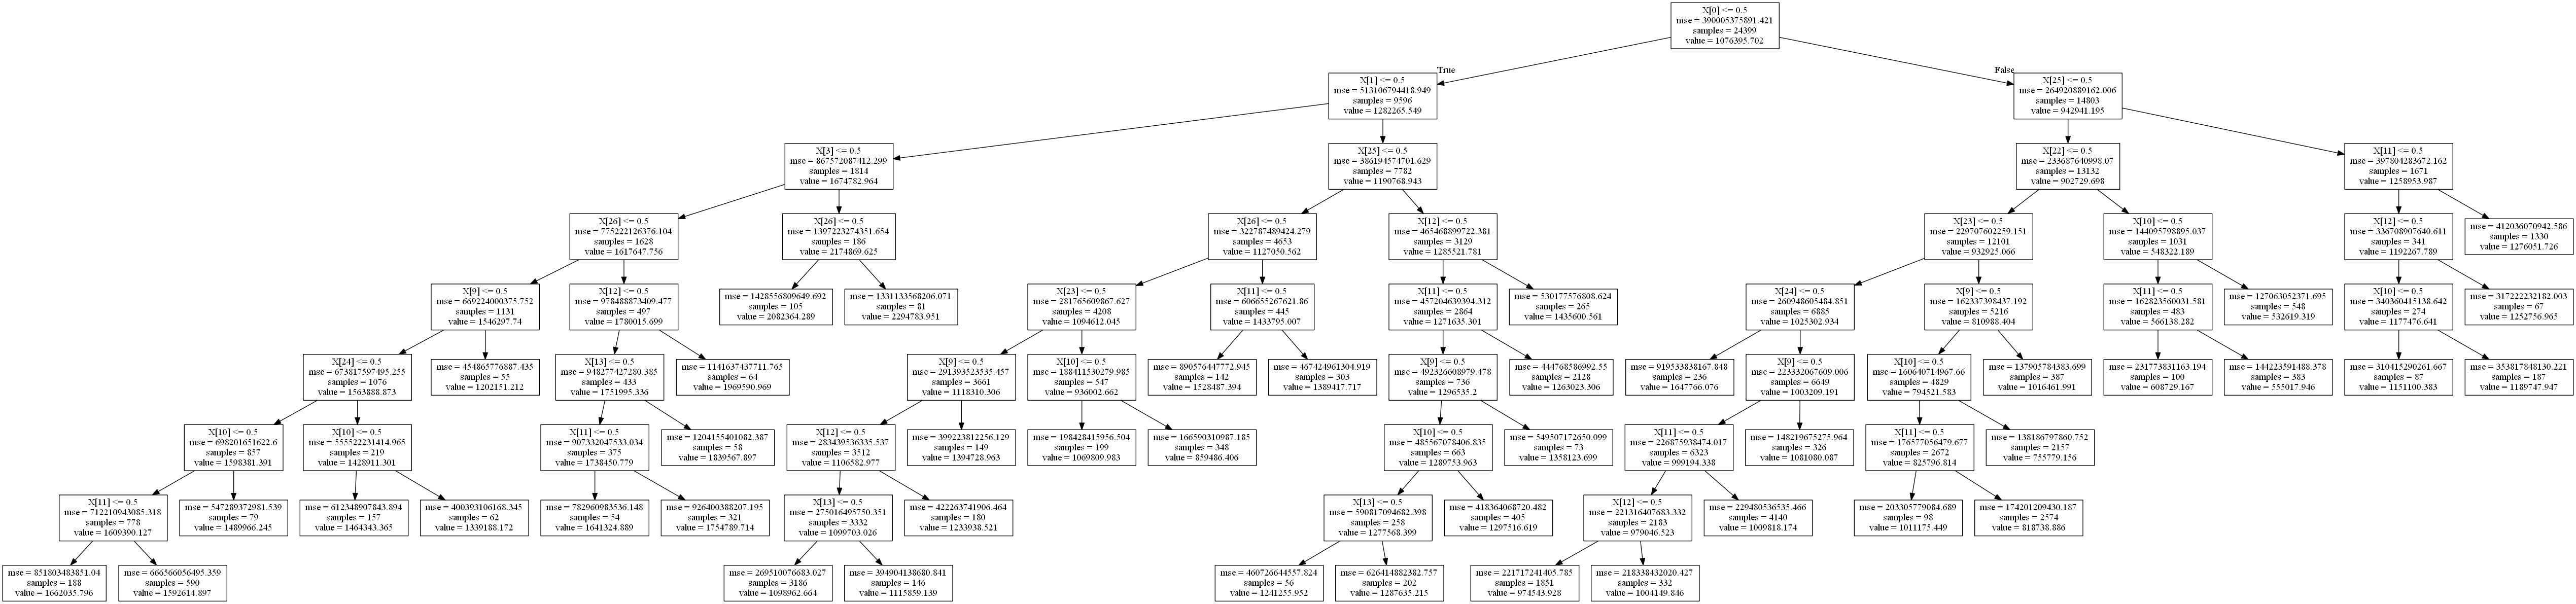

In [84]:
from sklearn.ensemble import RandomForestClassifier
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Packages for rendering our tree.
import pydotplus
import graphviz

# Creating the classifier object 
clf = DecisionTreeRegressor(max_depth=8, min_samples_leaf=50, random_state = 42, splitter='best') 

# Performing training 
clf.fit(X_train, y_train) 

# Make predictions on test data
y_pred = clf.predict(X_test)


# Render our tree.
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names = ('Price'))
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())





In [85]:
from sklearn.model_selection import cross_val_score


#score = cross_val_score(regressor, X_test, y_test)
score = clf.score(X_test, y_test)

print (score) 

0.18202014891057172


In [86]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()
X = columns
y= dfdum['Price']


cross_val_score(rfr, X, y, cv=10)

C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users

array([0.16210844, 0.23597446, 0.17209945, 0.20534533, 0.13782555,
       0.10159916, 0.15782261, 0.14486425, 0.03860576, 0.14684785])

In [87]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)
print('R² for the train model:')
print(lass.score(X_train, y_train))
print('R² for the test model:')
print(lass.score(X_test, y_test))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)

R² for the train model:
0.19101669842155633
R² for the test model:
0.1784402249513125

Parameter estimates for the model:
[  62678.74183627  145105.33766389  424144.72849743  923268.56134731
  723679.23548063  588856.5654474  1017271.49015478  236185.0175589
  515755.58025647  128151.92810832  -52580.45609314  -14414.28319298
   67275.00819816  -14780.70050078  -88519.19506324 -116080.79048808
  189360.05600622 -231485.35365238 1061452.91519301 -529987.84676336
 -543327.14754322  262375.72448519 -610519.46679256 -349558.20209841
 -153635.39209649   51904.060396    252297.37495096   80367.8660639
  229168.77370205   19218.36361679   -4464.85875453  684154.96022919
 -663178.61243631 3865796.59973618 1120964.0863573 ]


C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2200143254150141.0, tolerance: 951574116637.4974
  positive)


In [88]:
from sklearn.linear_model import Ridge
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))

0.18775354249521914
0.17728828297272736


In [89]:
#Staring the modeling process again with dropping all rows with missing values.  There is a lot of missing data
#from this set which is throwing off our models.  We will take a hit on our dataset, but we should get more 
#predictable values.

In [90]:
dfdrop = df
dfdrop = dfdrop.dropna()
print (dfdrop.shape)
print (dfdrop.head())

(8887, 21)
        Suburb          Address  Rooms Type      Price Method SellerG  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
4   Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
6   Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
11  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
14  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
2   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
4   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
6   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
11  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
14  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   

    YearBuilt         CouncilArea Lattitude  Longtitude  \
2   

In [91]:
dfdrop.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.475074,0.276585,0.084236,0.964465,0.624070,0.401423,0.101158,0.606738,0.006935,0.018758,0.083016,-0.082797
Price,0.475074,1.000000,-0.231212,0.046033,0.460880,0.463501,0.209464,0.058375,0.507284,-0.313664,-0.224255,0.212174,-0.059720
Distance,0.276585,-0.231212,1.000000,0.489537,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941,-0.003247
Postcode,0.084236,0.046033,0.489537,1.000000,0.087286,0.111617,0.055531,0.069623,0.077091,0.089913,-0.195081,0.358005,0.032758
Bedroom2,0.964465,0.460880,0.283460,0.087286,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671,-0.081392
Bathroom,0.624070,0.463501,0.122132,0.111617,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268,-0.058324
Car,0.401423,0.209464,0.259374,0.055531,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589,-0.031285
Landsize,0.101158,0.058375,0.138559,0.069623,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196,-0.032548
BuildingArea,0.606738,0.507284,0.135509,0.077091,0.595299,0.553855,0.317593,0.083229,1.000000,0.059936,-0.034626,0.097635,-0.059024
YearBuilt,0.006935,-0.313664,0.313383,0.089913,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886,0.017224


In [92]:
#These columns represent data that serves us little to no help in our predictability.
dfdrop = dfdrop.drop({ 'Postcode','Address', 'Method', 'SellerG', 'CouncilArea',
                      'Regionname', 'Propertycount', 'Suburb', 'Distance', 'YearBuilt', 'Date'}, axis = 1)

In [93]:
#Make sure they dropped
dfdrop.columns

Index(['Rooms', 'Type', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude'],
      dtype='object')

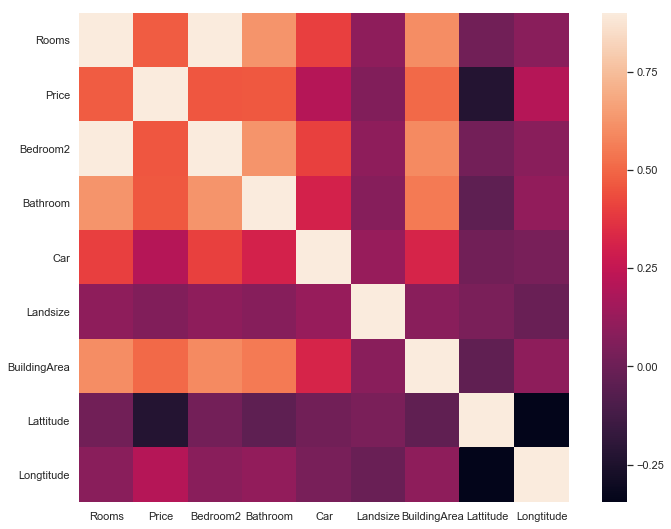

In [95]:
corrmat = dfdrop.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .9, square = True)
plt.show()

In [96]:
#Landsize is not correlated with Price
dfdrop = dfdrop.drop('Landsize', axis=1)

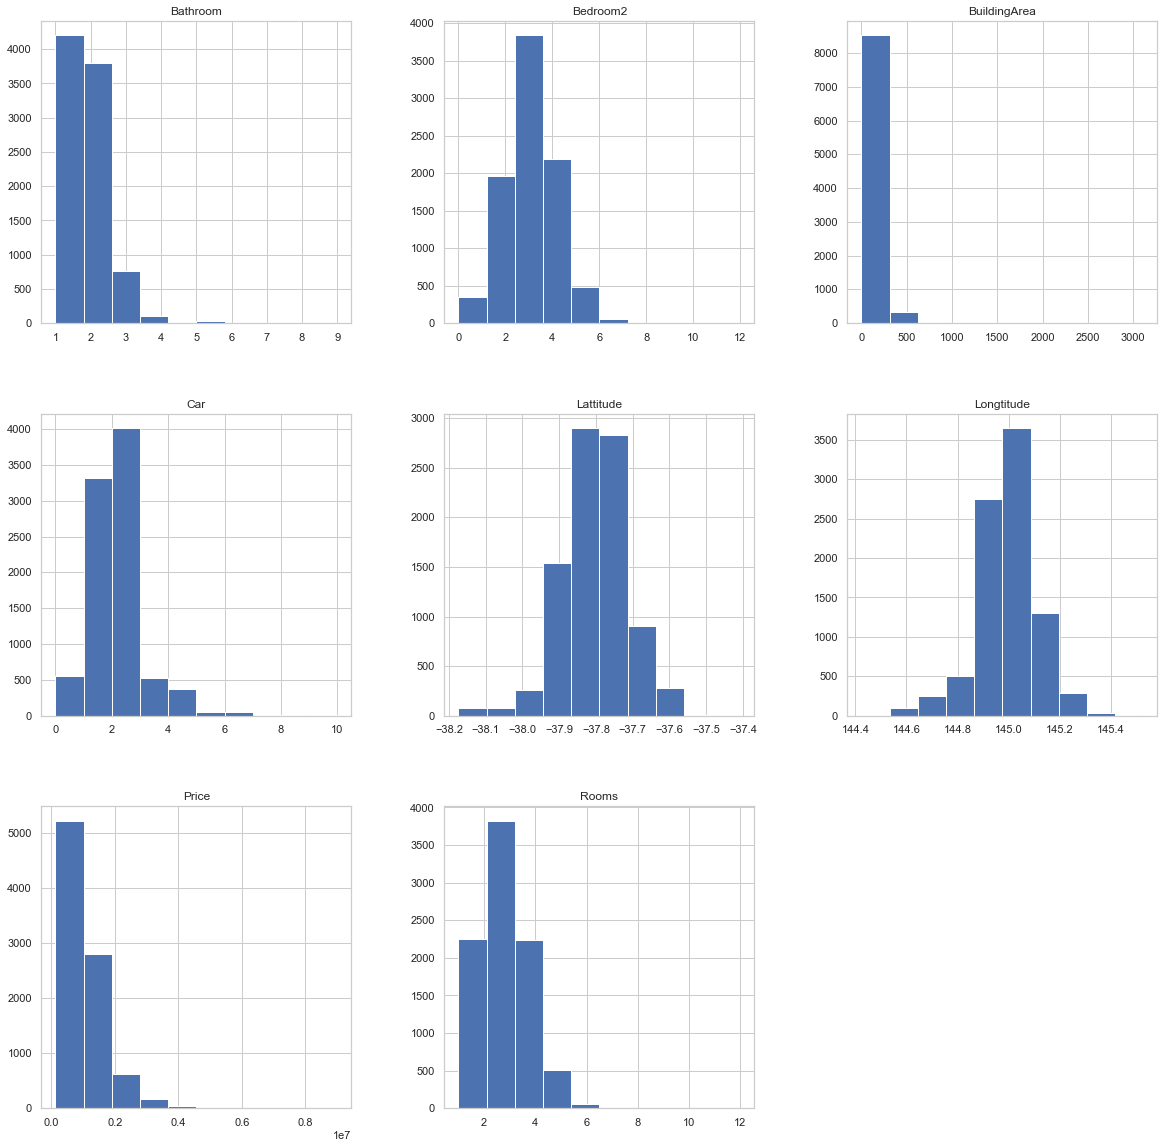

In [97]:
dfdrop.hist(figsize = (20,20))
plt.show()

In [99]:
dummytype = pd.get_dummies(dfdrop['Type'])

#rename the columns for better understanding
dummytype = dummytype.rename(columns={'h':'house' , 't':'townhouse', 'u':'unit,duplex'})
dfdrop = dfdrop.merge(dummytype, left_index=True, right_index = True)

dfdrop = dfdrop.drop('Type', axis=1)

KeyError: 'Type'

In [100]:
#Run a linear regression on the cleaned dataset
from sklearn import linear_model
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split



X = dfdrop.drop('Price', axis=1)
y= dfdrop['Price']



regr = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
regr.fit(X_train, y_train)


print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

print("R-squared of the model in the training set is: {}".format(regr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(regr.score(X_test, y_test)))


The number of observations in training set is 6220
The number of observations in test set is 2667
R-squared of the model in the training set is: 0.3971387367719929
-----Test set statistics-----
R-squared of the model in the test set is: 0.3997103174701193


In [101]:
# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [  151578.05336661   -85404.62181009   234488.60677683   -17427.68530466
     1818.89589872 -1473366.27409475   523555.62772474   198564.37292901
   -84976.78495994  -113587.58796907]
Intercept: 
 -131468988.6918658


In [102]:
dfdrop.columns

Index(['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea',
       'Lattitude', 'Longtitude', 'house', 'townhouse', 'unit,duplex'],
      dtype='object')

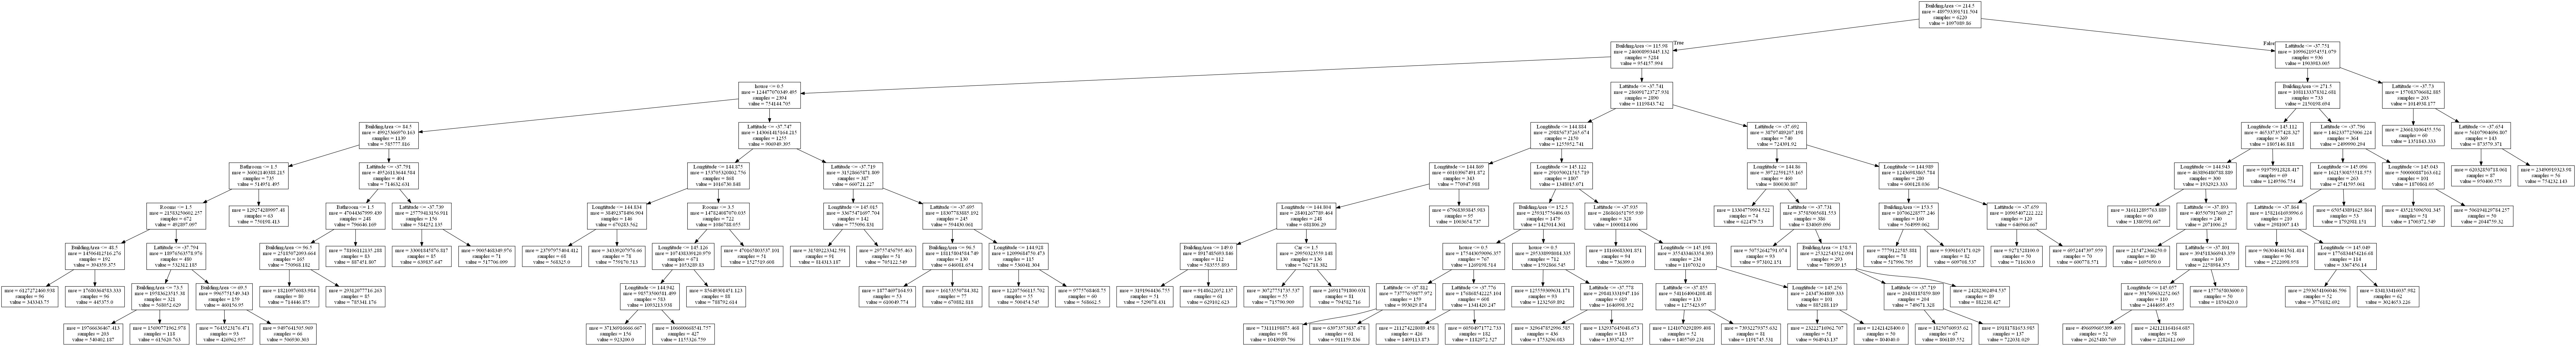

In [109]:
#Try running a DecisionTreeRegression
from sklearn.ensemble import RandomForestRegressor
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Packages for rendering our tree.
import pydotplus
import graphviz

# Creating the classifier object 
clf = DecisionTreeRegressor(max_depth=8, min_samples_leaf=50, random_state = 42, splitter='best') 

# Performing training 
clf.fit(X_train, y_train) 

# Make predictions on test data
y_pred = clf.predict(X_test)


# Render our tree.
dot_data = tree.export_graphviz(clf, out_file=None,
    feature_names=('Rooms', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea',
       'Lattitude', 'Longtitude', 'house', 'townhouse', 'unit,duplex'),
    class_names = dfdrop['Price'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())





In [110]:
#Decision Tree score
from sklearn.model_selection import cross_val_score


#score = cross_val_score(regressor, X_test, y_test)
score = clf.score(X_test, y_test)

print (score) 

0.653862632605003


In [106]:
#Try running a RandomForestRegression.
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()
X = dfdrop.drop('Price', axis=1)
y= dfdrop['Price']


cross_val_score(rfr, X, y, cv=10)

C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\test\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users

array([0.73868163, 0.76072627, 0.69691806, 0.77732128, 0.77312303,
       0.75390011, 0.66085007, 0.73161212, 0.79100679, 0.77990827])

This is our BEST score from any of the models on both the dataset with missing values either converted into the mode or interpolated and the dataset where we dropped all rows missing information.  The level of missing/corrupted data in this set was high.  Therefore, the heavily reduced dataset cleaned of missing rows should give us a better model.

In [107]:
#Try running a Lasso model
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)
print('R² for the train model:')
print(lass.score(X_train, y_train))
print('R² for the test model:')
print(lass.score(X_test, y_test))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)

R² for the train model:
0.39713873671552097
R² for the test model:
0.3997108075568391

Parameter estimates for the model:
[ 1.51568983e+05 -8.53948014e+04  2.34487753e+05 -1.74272743e+04
  1.81890327e+03 -1.47333053e+06  5.23539192e+05  3.03252697e+05
  1.97091033e+04 -8.89491793e+03 -1.31569946e+08]


In [108]:
#Try running a Ridge model
from sklearn.linear_model import Ridge
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))

0.37290025057513887
0.3706996513203409
